In [43]:
#preprocessing
import pandas as pd

#To read the CSV file
df=pd.read_csv("IMDB_Movies.csv")

#To know the no. of rows and columns in the file
print("No. of rows: " ,df.shape[0])
print("No. of columns: ", df.shape[1])

No. of rows:  1000
No. of columns:  12


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [45]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [46]:
df.duplicated().sum() 

0

In [47]:
df.describe()


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [48]:
df.fillna(value={'Revenue (Millions)': 13}, inplace=True)
df.fillna(value={'Metascore': 11}, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [50]:
#To find the no of unique values for columns Genre, Actors and directors
columns= ['Genre','Actors','Director']

for column in columns:
    if column in df.columns:
        print(f"No of {column} in the dataset is: {df[column].nunique()}")

No of Genre in the dataset is: 207
No of Actors in the dataset is: 996
No of Director in the dataset is: 644


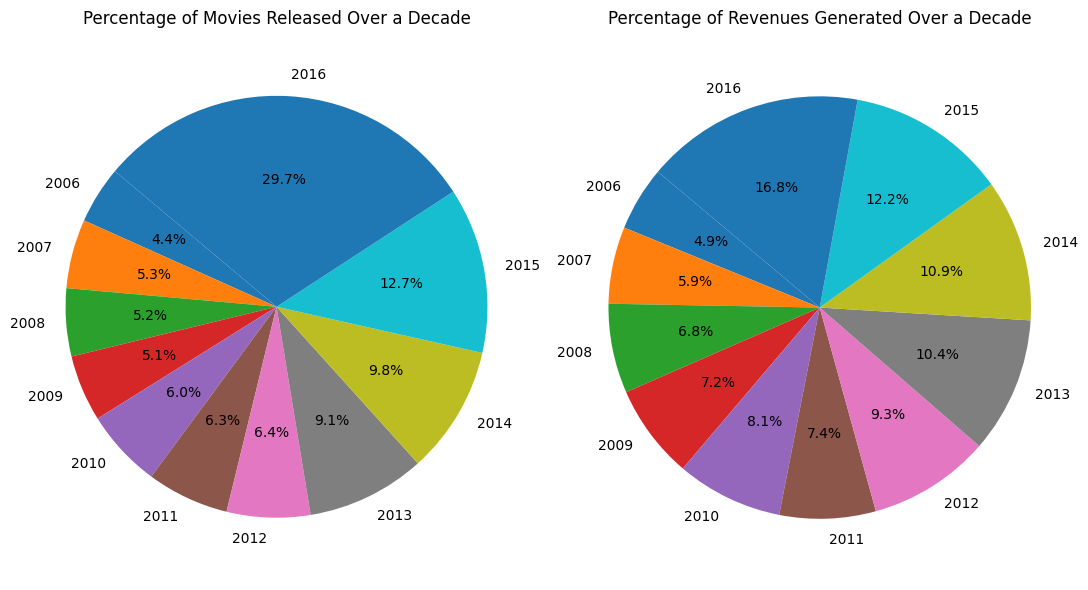

In [51]:
#Question 1 : Calculate the percentage of movies and revenue for a decade.
import matplotlib.pyplot as plt

#Function 1 :To represent the percentage of movies for a decade
def movies_percentage():
    movies_per_year = df.groupby('Year')['Title'].count().reset_index(name='Total_Movies')
    total_movies_decade = movies_per_year['Total_Movies'].sum()
    movies_per_year['Movies_Percentage'] = (movies_per_year['Total_Movies'] / total_movies_decade) * 100
    return movies_per_year['Movies_Percentage'],movies_per_year['Year']

#Function 2 :To represent the percentage of revenues for a decade
def revenue_percentage():
    revenue_per_year = df.groupby('Year')['Revenue (Millions)'].sum().reset_index(name='Total_Revenue')
    total_revenue_decade = revenue_per_year['Total_Revenue'].sum()
    revenue_per_year['Revenue_Percentage'] = (revenue_per_year['Total_Revenue'] / total_revenue_decade) * 100
    return revenue_per_year['Revenue_Percentage'],revenue_per_year['Year']
    
#Function 3 :visualising the pie charts for movies and revenues.
def graphical_rep():
    fig, axs = plt.subplots(1, 2, figsize=(11, 6))
    movies,year = movies_percentage()
    axs[0].pie(movies, labels = year, autopct='%1.1f%%', startangle=140)
    axs[0].set_title('Percentage of Movies Released Over a Decade')
    axs[0].axis('equal')
    revenues,year = revenue_percentage()
    axs[1].pie(revenues,labels=year, autopct='%1.1f%%', startangle=140)
    axs[1].set_title('Percentage of Revenues Generated Over a Decade')
    axs[1].axis('equal')
    plt.tight_layout()
    plt.show()

def main():
    graphical_rep()

if __name__ == "__main__":
    main()

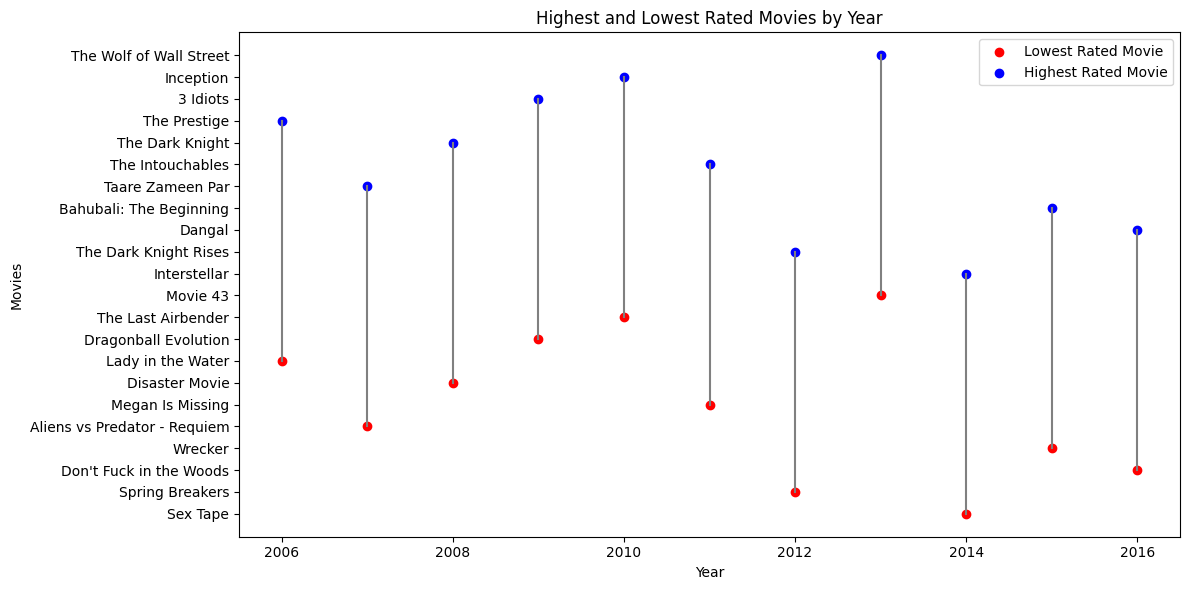

In [52]:
#Question 2: What is the higest and lowest rated film every year?
import matplotlib.pyplot as plt

#Function1 : To find the higest and lowest rated film
def highest_lowest_rated_film(year_df):
    highest = year_df.loc[year_df['Rating'].idxmax(), 'Title']
    lowest = year_df.loc[year_df['Rating'].idxmin(), 'Title']
    return highest, lowest

#Function2: Graphical representation of films using scatter plot
def graph_representation(result_df):
    plt.figure(figsize=(12, 6))
    plt.scatter(result_df['Year'], result_df['Lowest'], color='red', label='Lowest Rated Movie')
    plt.scatter(result_df['Year'], result_df['Highest'], color='blue', label='Highest Rated Movie')
    for i in range(len(result_df)):
        plt.plot([result_df['Year'][i], result_df['Year'][i]], [result_df['Lowest'][i], result_df['Highest'][i]], color='gray')

    plt.xlabel('Year')
    plt.ylabel('Movies')
    plt.title('Highest and Lowest Rated Movies by Year')
    plt.legend()
    plt.tight_layout()
    plt.show()

#Main function - filtering the year an d perfoming the function highest_lowest_rated_film
def main():
    years = df['Year'].unique()
    results = {'Year': [], 'Lowest': [], 'Highest': []}
    for year in years:
        year_df = df[df['Year'] == year]
        highest_rated, lowest_rated = highest_lowest_rated_film(year_df)
        results['Year'].append(year)
        results['Highest'].append(highest_rated)
        results['Lowest'].append(lowest_rated)
    result_df = pd.DataFrame(results)
    graph_representation(result_df)

if __name__ == "__main__":
    main()

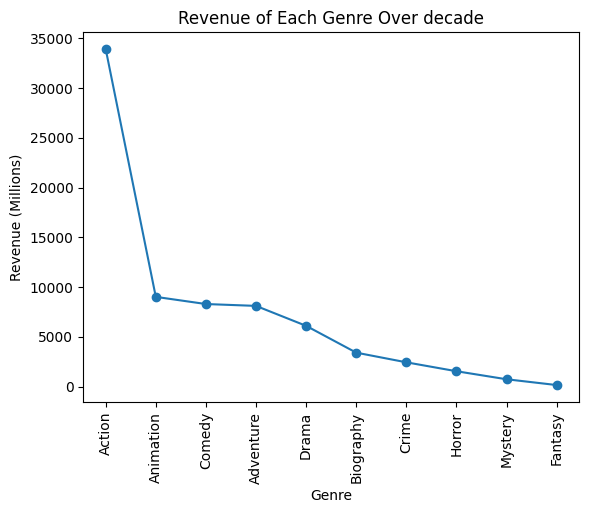

In [53]:
#Question 3 : List the top 10 genres and revenue associated with it?
import matplotlib.pyplot as plt

#Function 1: To slpit the genre into three columns and creating new dataframe.
def split_genre():
    genre_df = df['Genre'].str.split(',', expand=True)
    genre_df.rename(columns = {0: 'Primary_Genre', 1: 'Secondary_Genre', 2:'Additional_Genre'}, inplace = True)
    concat_genre(genre_df)
#Function 2: concat genre into new movies dataframe
def concat_genre(genre_df):
    new_df = pd.concat([df, genre_df], axis = 1)
    top_10_genre_revenue(new_df)
    
#Function 3: Top 10 genre and associated revenues.
def top_10_genre_revenue(new_df):
    genre_revenue = new_df.groupby('Primary_Genre')['Revenue (Millions)'].sum().reset_index()
    genre_revenue = genre_revenue.sort_values(by='Revenue (Millions)', ascending=False)
    top_10_genre = genre_revenue.head(10)
    graph_representation(top_10_genre)
    
#Function 4: graph representation of genre vs revenues.
def graph_representation(top_10_genre):
    plt.plot(top_10_genre['Primary_Genre'], top_10_genre['Revenue (Millions)'],marker= 'o') 
    plt.xlabel('Genre')
    plt.ylabel('Revenue (Millions)')
    plt.title('Revenue of Each Genre Over decade')
    plt.xticks(rotation=90)  
    plt.show()

#main function
def main():
    split_genre()
    
if __name__ == "__main__":
     main()

In [54]:
#Question 4 : Top 10 directors based on rating and movie count.
import pandas as pd

#Function1 : To calculate average rating and count of movies for each director
def calculate_rating(df):
    director_details = {}
    for director, group in df.groupby('Director'):
        director_details[director] = {'Rating': group['Rating'].mean(), 'Movies_count': len(group), 'Revenue' : group['Revenue (Millions)'].sum(), \
                                     'Critics': group['Metascore'].mean() }
    top_10_directors(director_details)

#Function2 : To get the top 15 directors based on rating
def top_10_directors(director_details):
 directors_df = pd.DataFrame.from_dict(director_details,orient = 'index',columns=[ 'Movies_count','Rating','Revenue','Critics'])
 directors_df = directors_df.rename_axis('Director').reset_index()
 #directors_df.rename(columns={'Movies_count': 'Movie Count','Overall_Rating': 'Rating','Overall_Revenue': 'Revenue' }, inplace=True)
 directors_df.sort_values(by='Revenue', ascending=False, inplace=True)
 top_10_directors = directors_df.head(15)
 print(top_10_directors.to_string(index=False))
   
#Function3: Calculate the rating by using dataset as an input    
def main():
    calculate_rating(df)

if __name__ == "__main__" :
      main()


         Director  Movies_count   Rating  Revenue   Critics
      J.J. Abrams             5 7.580000  1683.45 74.600000
      David Yates             6 7.433333  1630.51 68.500000
Christopher Nolan             5 8.680000  1515.09 74.800000
      Michael Bay             6 6.483333  1421.32 43.833333
 Francis Lawrence             4 7.025000  1299.81 67.500000
      Joss Whedon             2 7.750000  1082.27 67.500000
      Jon Favreau             4 7.425000  1025.60 70.250000
      Zack Snyder             5 7.040000   975.74 48.000000
    Peter Jackson             4 7.475000   860.45 56.250000
   Gore Verbinski             4 6.850000   829.82 40.250000
       Justin Lin             5 6.820000   824.79 57.200000
   Andrew Stanton             3 7.466667   783.16 46.333333
    James Cameron             1 7.800000   760.51 83.000000
   Gareth Edwards             2 7.150000   732.83 63.500000
     Ridley Scott             8 6.850000   719.06 59.750000


In [55]:
#Question 5: To know the successful collabration of actor and director based on rating and revenue.

#Function1 : To check the director and actor present in datset
def check_names(df, director, actor):
    if ((director in df['Director'].values) & any(actor in actors for actors in df['Actors'])):
        average_rating_revenue(df,director,actor)
    else:
        print("names not found")

#Function2 : To find the rating and revenue for collabration
def average_rating_revenue(df, director, actor):
     filtered_df = df[(df['Director'] == director) & df['Actors'].apply(lambda x: actor in x)]
     if not filtered_df.empty:
        print("The average rating : ",filtered_df['Rating'].mean())
        print("Average revenue: ", filtered_df['Revenue (Millions)'].mean())
     else:
         print("No collabration found")

#Function 3: To get inputs - Director and actor and function call for check_names
def main():
    director = input("Enter the director name:" )
    actor = input("Enter the actor name:" )
    check_names(df, director, actor)

if __name__ == "__main__":
    main()

Enter the director name: Christopher Nolan
Enter the actor name: Matthew McConaughey


The average rating :  8.6
Average revenue:  187.99
